In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2 as tk
import thinkplot

In [2]:
df=pd.read_csv("Admission_Predict.csv")

In [3]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [5]:
df["GRE Score"].mean()

316.8075

In [6]:
desc=df.describe().transpose()
desc

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [7]:
df.shape

(400, 9)

In [8]:
print(df["CGPA"].isnull().value_counts())

False    400
Name: CGPA, dtype: int64


Text(0.5, 0, 'CGPA')

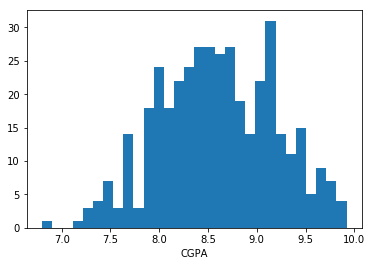

In [9]:
hist=plt.hist(df.CGPA,bins=30)
plt.xlabel("CGPA")

In [10]:
desc['iqr']=desc['75%']-desc['25%']
desc['lowerb']=desc['25%']-(1.5*desc['iqr'])
desc['higherb']=desc['75%']+(1.5*desc['iqr'])

In [11]:
df.drop(df[(df['CGPA']<desc.loc['CGPA'].lowerb) | 
              (df['CGPA']>desc.loc['CGPA'].higherb)].index,inplace=True )




{'whiskers': [<matplotlib.lines.Line2D at 0x10934157e80>,
 'caps': [<matplotlib.lines.Line2D at 0x109341634e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x10934157a58>],
 'medians': [<matplotlib.lines.Line2D at 0x10934163b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x10934163eb8>],
 'means': []}

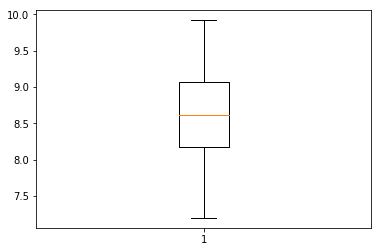

In [12]:
plt.boxplot(df.CGPA)

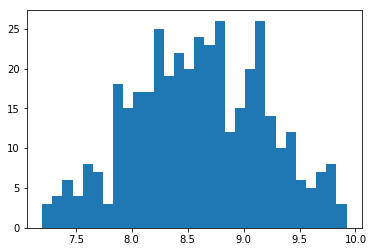

In [14]:
hist=plt.hist(df.CGPA,bins=30)

In [14]:
print("mean",df.CGPA.mean())
print("var",df.CGPA.var())
print("std",df.CGPA.std())
print("describe method",df.CGPA.describe())

mean 8.6034335839599
var 0.34833617082908275
std 0.5902001108345226
describe method count    399.000000
mean       8.603434
std        0.590200
min        7.200000
25%        8.175000
50%        8.620000
75%        9.065000
max        9.920000
Name: CGPA, dtype: float64


{'xscale': 'linear', 'yscale': 'linear'}

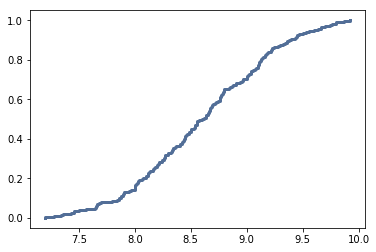

In [38]:
cdf=tk.Cdf(df.CGPA)
thinkplot.Cdf(cdf)

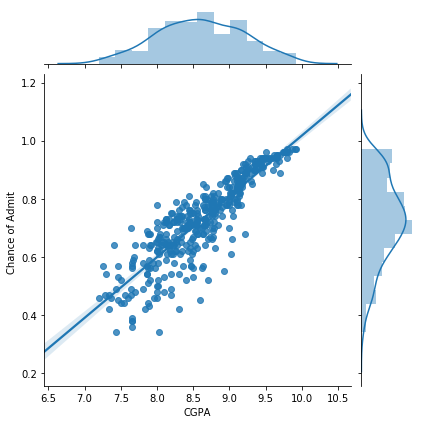

In [16]:
sns.jointplot(df.CGPA,df["Chance of Admit "],kind="regg")


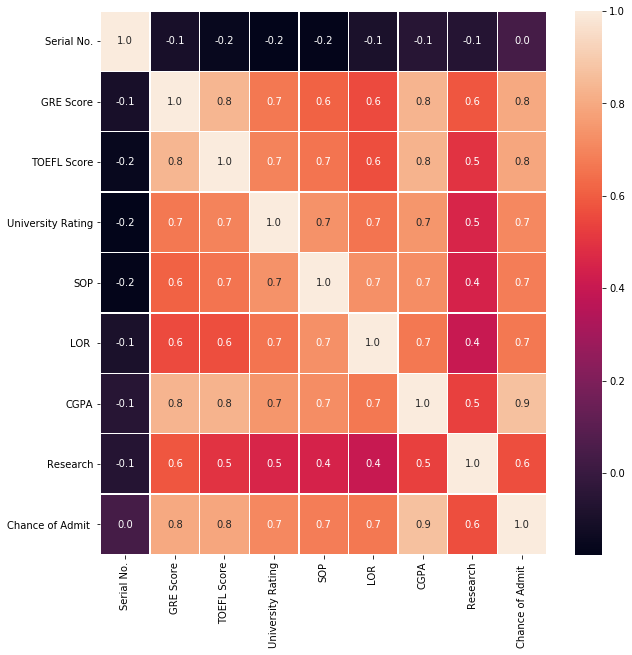

In [16]:
f,ax=plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(method="pearson"),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)

In [18]:
df.corr(method="pearson")

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.102500,-0.152849,-0.176633,-0.168505,-0.093677,-0.055628,-0.060522,0.034831
GRE Score,-0.102500,1.000000,0.835143,0.666847,0.613145,0.554922,0.833770,0.585920,0.801957
TOEFL Score,-0.152849,0.835143,1.000000,0.693814,0.658317,0.565313,0.829433,0.494725,0.791108
University Rating,-0.176633,0.666847,0.693814,1.000000,0.735933,0.657621,0.744289,0.454320,0.708312
SOP,-0.168505,0.613145,0.658317,0.735933,1.000000,0.730526,0.723595,0.445485,0.678905
LOR,-0.093677,0.554922,0.565313,0.657621,0.730526,1.000000,0.667808,0.402286,0.667181
CGPA,-0.055628,0.833770,0.829433,0.744289,0.723595,0.667808,1.000000,0.535239,0.871030
Research,-0.060522,0.585920,0.494725,0.454320,0.445485,0.402286,0.535239,1.000000,0.564257
Chance of Admit,0.034831,0.801957,0.791108,0.708312,0.678905,0.667181,0.871030,0.564257,1.000000


In [36]:
ranked_df = df.rank()
spearman_corr = ranked_df.loc[:,["CGPA","Chance of Admit "]].corr(method= "pearson")
print("Spearman's correlation: ")
print(spearman_corr)


Spearman's correlation: 
                      CGPA  Chance of Admit 
CGPA              1.000000          0.877504
Chance of Admit   0.877504          1.000000


C:\Users\LENOVO\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 4.000e+00, 3.000e+00,
        3.000e+00, 3.000e+00, 3.000e+00, 9.000e+00, 1.000e+01, 2.400e+01,
        1.800e+01, 2.600e+01, 3.800e+01, 3.600e+01, 6.700e+01, 6.100e+01,
        7.800e+01, 9.600e+01, 1.340e+02, 1.590e+02, 2.060e+02, 2.660e+02,
        3.410e+02, 3.680e+02, 4.290e+02, 4.930e+02, 6.710e+02, 7.080e+02,
        8.430e+02, 1.020e+03, 1.085e+03, 1.315e+03, 1.405e+03, 1.598e+03,
        1.739e+03, 1.935e+03, 2.102e+03, 2.229e+03, 2.487e+03, 2.552e+03,
        2.753e+03, 2.913e+03, 3.005e+03, 3.210e+03, 3.301e+03, 3.255e+03,
        3.406e+03, 3.488e+03, 3.353e+03, 3.372e+03, 3.359e+03, 3.323e+03,
        3.240e+03, 3.108e+03, 3.049e+03, 2.777e+03, 2.550e+03, 2.488e+03,
        2.271e+03, 2.075e+03, 1.866e+03, 1.740e+03, 1.613e+03, 1.444e+03,
        1.245e+03, 1.109e+03, 9.230e+02, 8.300e+02, 7.240e+02, 6.440e+02,
        5.350e+02, 4.510e+02, 3.860e+02, 3.540e+02, 2.620e+02, 1.940e+02,
        1.630e+02, 1.390e+02, 1.120e+0

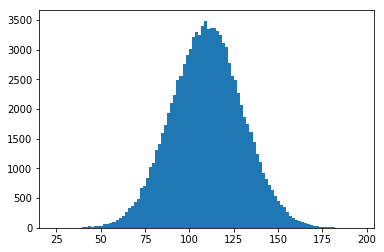

In [31]:
mu, sigma = 110, 20  # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)
("mean: ", np.mean(s))
("standart deviation: ", np.std(s))
# visualize with histogram
plt.hist(s,100,normed=False)


In [20]:
df_r=df[df["Research"]=="1"]
df_rn=df[df["Research"]=="0"]

C:\Users\LENOVO\Miniconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [23]:
mean_diff=df_r.Research.mean()-df_rn.Research.mean()
var_r=df_r.Research.var()
var_rn=df_rn.Research.var()
var_pooled=(len(df_r)*var_r)+(len(df_rn)*var_rn)/ float(len(df_r)+len(df_rn))
effect_size=mean_diff/np.sqrt(var_pooled)
print(effect_size)


ZeroDivisionError: float division by zero

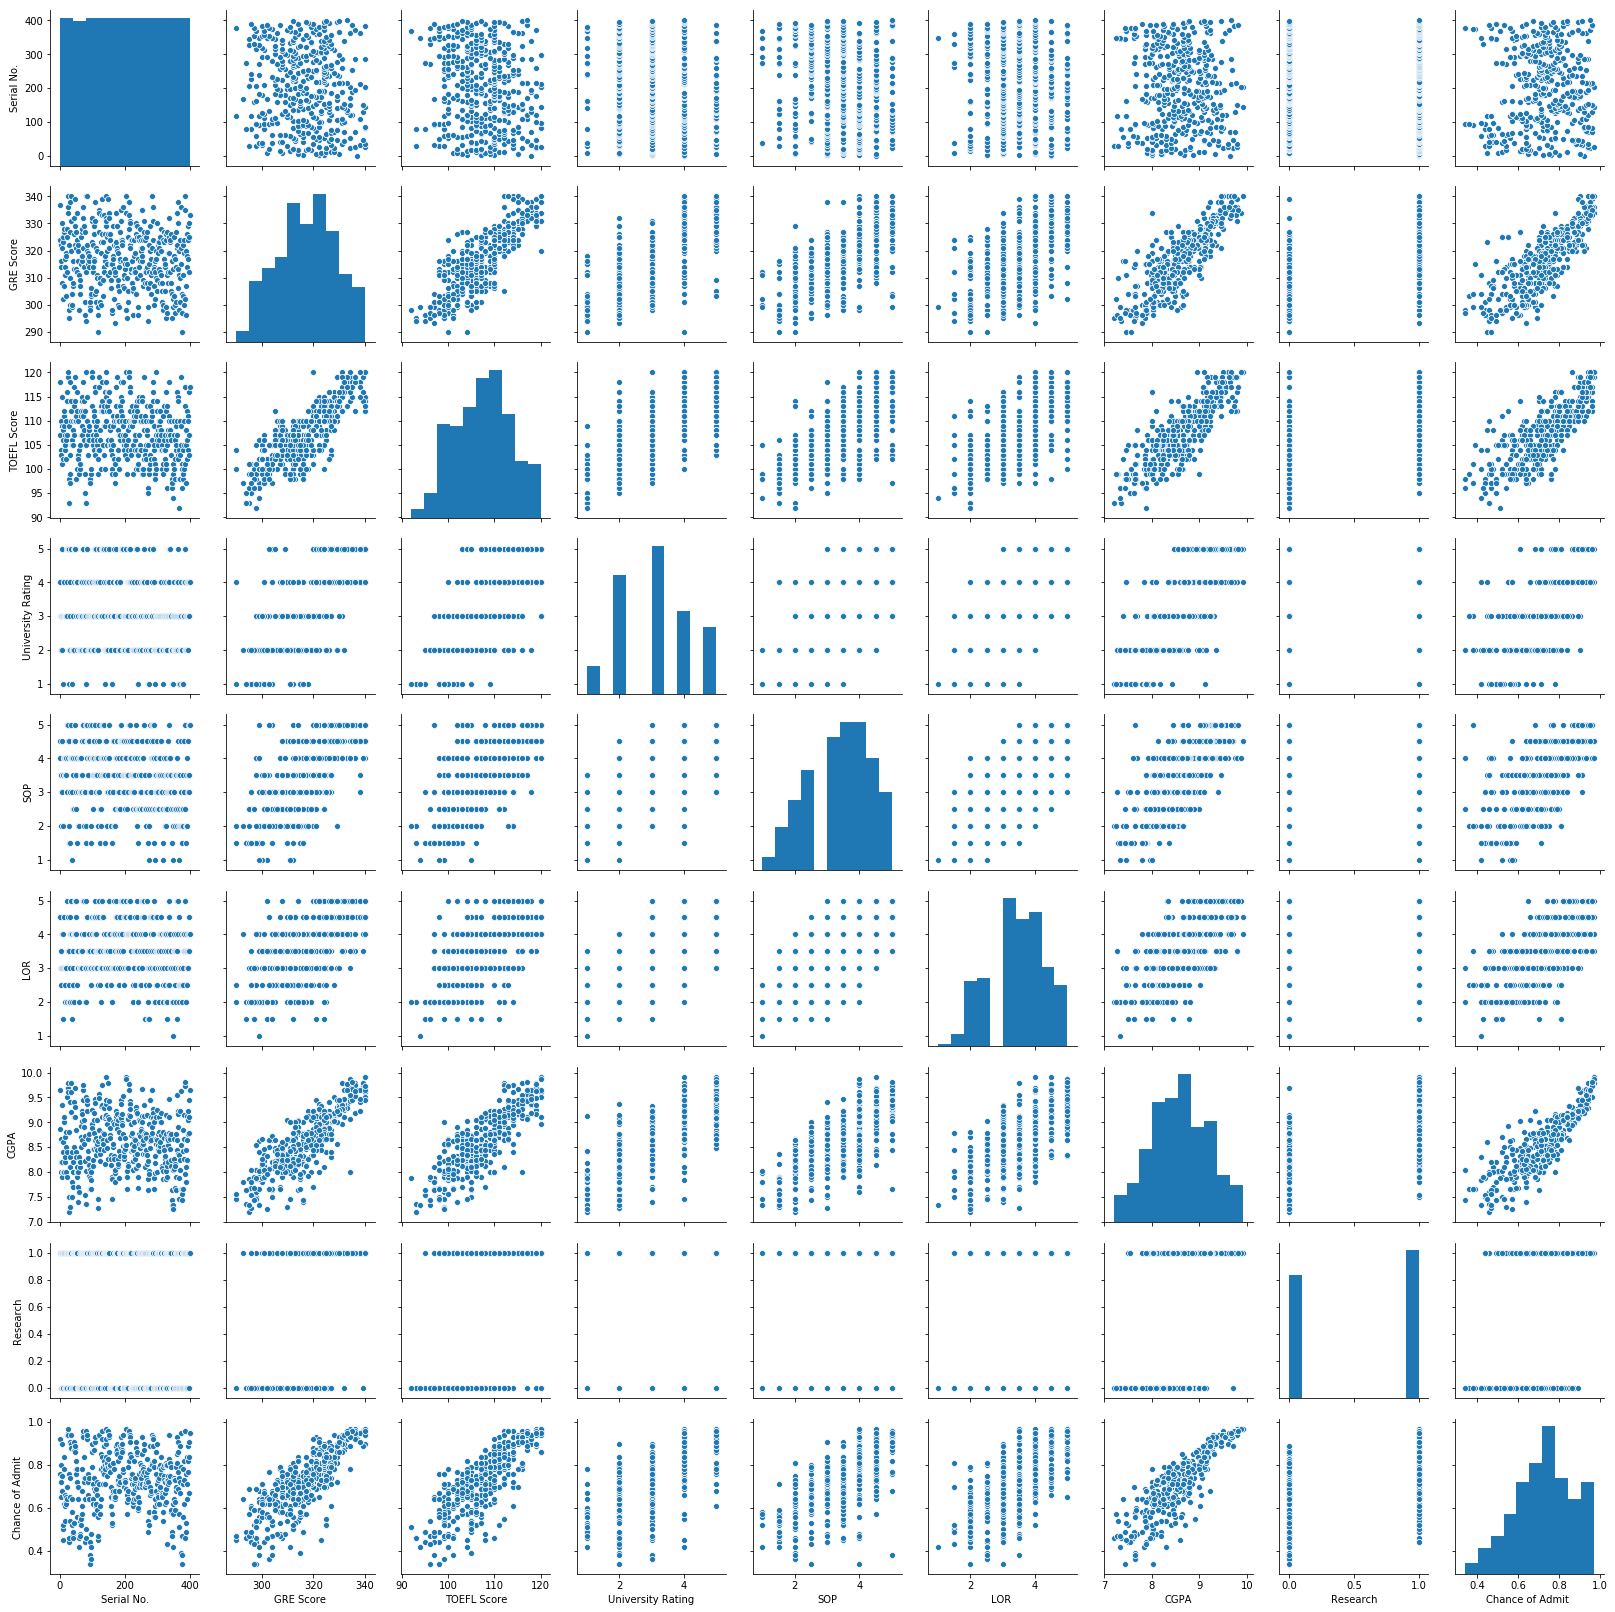

In [32]:
sns.pairplot(df)

In [33]:
np.cov(df["CGPA"],df["Research"])

array([[0.34833617, 0.15746603],
       [0.15746603, 0.24847294]])

In [34]:
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
t_statistic, p_value = ttest_ind(df.CGPA,df["Chance of Admit "])
print( p_value)

0.0
